# Comparaison d'Algorithmes de Tri en Python

Nous allons comparer **3 algorithmes de tri** avec des complexités différentes :

1. **Bubble Sort** : Complexité $O(n^2)$
   - Compare des paires successives et échange si nécessaire.
   - Très lent pour des grandes listes.

2. **Merge Sort** : Complexité $O(n \log n)$
   - Divise la liste en deux, trie récursivement, puis fusionne.
   - Plus efficace et utilisé en pratique.

3. **Timsort (sort Python intégré)** : Complexité moyenne $O(n \log n)$
   - Algorithme hybride (Merge Sort + Insertion Sort).
   - Utilisé par défaut en Python (`list.sort()`, `sorted()`).


In [10]:
import random, time

# Génération d'une liste aléatoire
arr = [random.randint(0, 100000) for _ in range(5000)]


## 1. Bubble Sort (O(n^2))

In [11]:
def bubble_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
    return a

start = time.time()
bubble_sorted = bubble_sort(arr)
t_bubble = time.time() - start
t_bubble

1.4562253952026367

## 2. Merge Sort (O(n log n))

In [12]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    res = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            res.append(left[i])
            i += 1
        else:
            res.append(right[j])
            j += 1
    res.extend(left[i:])
    res.extend(right[j:])
    return res

start = time.time()
merge_sorted = merge_sort(arr)
t_merge = time.time() - start
t_merge

0.0174558162689209

## 3. Timsort (Python built-in, O(n log n))

In [13]:
start = time.time()
tim_sorted = sorted(arr)
t_tim = time.time() - start
t_tim

0.0

## 4. Quick Sort (O(n log n) en moyenne, O(n^2) pire cas)
- Choisit un pivot et partitionne la liste en deux sous-listes.
- Trie récursivement chaque sous-liste.
- Très rapide en pratique, mais peut être lent si le pivot est mal choisi.

In [14]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]  # pivot au milieu
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

start = time.time()
quick_sorted = quick_sort(arr)
t_quick = time.time() - start
t_quick

0.017779827117919922

In [15]:
# Mettre à jour comparaison avec Quick Sort
print(f"Bubble Sort: {t_bubble:.4f} s")
print(f"Merge Sort: {t_merge:.4f} s")
print(f"Quick Sort: {t_quick:.4f} s")
print(f"Timsort (Python): {t_tim:.4f} s")

Bubble Sort: 1.4562 s
Merge Sort: 0.0175 s
Quick Sort: 0.0178 s
Timsort (Python): 0.0000 s


## Visualisation des vitesses des différents tris
Nous allons tracer un graphique comparant les temps d'exécution.

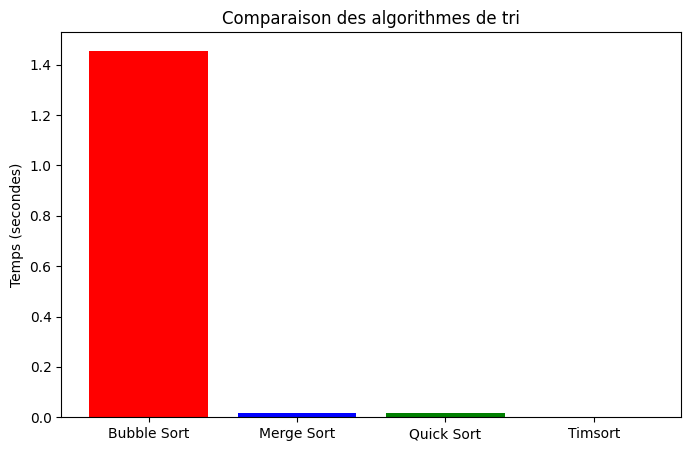

In [16]:
import matplotlib.pyplot as plt

algos = ["Bubble Sort", "Merge Sort", "Quick Sort", "Timsort"]
times = [t_bubble, t_merge, t_quick, t_tim]

plt.figure(figsize=(8,5))
plt.bar(algos, times, color=['red','blue','green','purple'])
plt.ylabel('Temps (secondes)')
plt.title('Comparaison des algorithmes de tri')
plt.show()

# Récapitulatif des algorithmes

### 1. Bubble Sort ($O(n^2)$)
- Compare des paires successives et échange si nécessaire.
- Inefficace sur grandes listes.

### 2. Merge Sort ($O(n \log n)$)
- Divise la liste en deux, trie récursivement, puis fusionne.
- Stable et prévisible.

### 3. Quick Sort ($O(n \log n)$ moyen, $O(n^2)$ pire cas)
- Choisit un pivot, partitionne, trie récursivement.
- Très efficace en pratique.

### 4. Timsort (Python, $O(n \log n)$)
- Algorithme hybride (Merge + Insertion).
- Optimisé pour les cas réels.


## Analyse de la croissance des temps selon la taille de la liste
Nous allons mesurer le temps d'exécution pour `n = 100, 500, 1000, 2000`.

In [17]:
import numpy as np

sizes = [100, 500, 1000, 2000]
results = {"Bubble": [], "Merge": [], "Quick": [], "Timsort": []}

for n in sizes:
    test_arr = [random.randint(0, 100000) for _ in range(n)]
    
    # Bubble
    start = time.time(); bubble_sort(test_arr); results["Bubble"].append(time.time()-start)
    # Merge
    start = time.time(); merge_sort(test_arr); results["Merge"].append(time.time()-start)
    # Quick
    start = time.time(); quick_sort(test_arr); results["Quick"].append(time.time()-start)
    # Timsort
    start = time.time(); sorted(test_arr); results["Timsort"].append(time.time()-start)

results

{'Bubble': [0.0, 0.01117086410522461, 0.0687260627746582, 0.2737998962402344],
 'Merge': [0.0,
  0.0013217926025390625,
  0.003102540969848633,
  0.006108760833740234],
 'Quick': [0.0010499954223632812,
  0.0,
  0.001995086669921875,
  0.005238056182861328],
 'Timsort': [0.0, 0.0, 0.0, 0.0]}

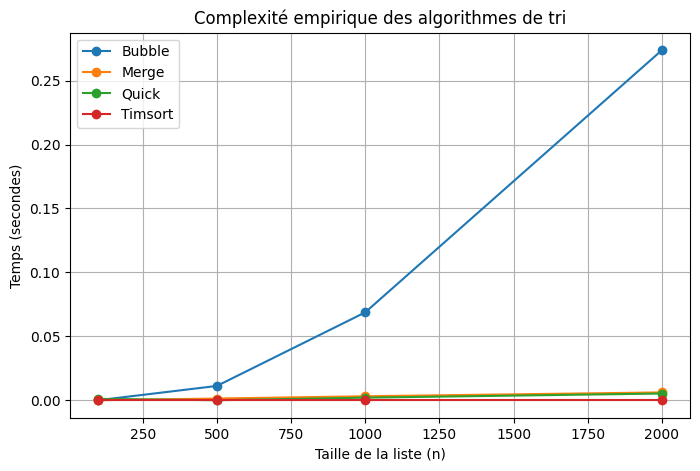

In [18]:
plt.figure(figsize=(8,5))
for algo, times in results.items():
    plt.plot(sizes, times, marker='o', label=algo)
plt.xlabel('Taille de la liste (n)')
plt.ylabel('Temps (secondes)')
plt.title('Complexité empirique des algorithmes de tri')
plt.legend()
plt.grid(True)
plt.show()